##
Merkez Bankası'nın takip ettiği enflasyon eğilimi göstergelerinden biri SATRIM(Seasonal Adjustment Trimmed Inflation).Yani Mevsimsellikten Arındırılmış Budanmış Enflasyon.

Peki anlamı nedir?
Öncelikle TÜFE sepetindeki bütün maddelerin aylık artışları mevsimsellikten arındırılır.Sonrasında sepette artış oranı en çok ve en az olan belli oranda maddeler (örneğin sepetin %10'u) sepetten çıkarılır ve kalan maddelerle ağırlıklar güncellenir.Sonrasında kalan maddelerin ağırlıklı ortalaması hesaplanır ve o aya ait SATRIM değeri elde edilir.

Halihazırda TÜİK madde sepetini açıklamıyor ancak 5-Digit olarak bilinen harcama gruplarını endekslerini açıklıyor.Bunun üzerinden SATRIM hesaplamak mümkün.

Grafikte sepetin en çok artan ve azalan %10'luk maddeleri dışlayarak hesapladığım SATRIM'ı görebilirsiniz.

Diğer grafikte ise ana eğilimi daha net görmek açısından SATRIM'in 3 aylık hareketli ortalamasının ima ettiği yıllıklandırılmış enflasyon değerlerini gösterdim.

Son yıllıklandırılmış değer %38'e denk gelmekte,mayıs ayındaki doğalgaz etkisi ve temmuz ayındaki 6 aylık ÜFE zamları etkisini dışlarsak yıllıklandırılmış değer %26'ya denk geliyor.Son 3 aylarda yönetilen/yönlendirilen fiyatlarda zamlar olduğu için ana eğilimi daha rahat anlamamız için Kasım ayını beklememiz gerekiyor,Kasım ayında 3 aylık ortalamada bu etkiler tamamen gitmiş olacak.

Kodu incelemek için:https://lnkd.in/dNhGuz8i

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [9]:
data=pd.read_excel("mevsim etkisinden arindirilmis tufe gostergeleri.xls")
tüfe_sa=data.iloc[7:8,3:].T
tüfe_sa=tüfe_sa.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(tüfe_sa)))
tüfe_sa.columns=["TÜFE"]
tüfe_sa["Enflasyon"]=tüfe_sa["TÜFE"].pct_change()*100
tüfe_sa

,TÜFE,Enflasyon
2005-01-31,114.08,NaN
2005-02-28,114.48,0.350631
2005-03-31,115.07,0.515374
2005-04-30,115.49,0.364995
2005-05-31,116.12,0.545502
...,...,...
2024-05-31,2255.99,3.542301
2024-06-30,2309.77,2.383876
2024-07-31,2391.87,3.554466
2024-08-31,2459.54,2.829167


In [16]:


tüfe_B=data.iloc[9:10,3:].T
tüfe_B=tüfe_B.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(tüfe_sa)))
tüfe_B.columns=["TÜFEB"]
tüfe_B["Enflasyon"]=tüfe_B["TÜFEB"].pct_change()*100
tüfe_B

,TÜFEB,Enflasyon
2005-01-31,115.43,NaN
2005-02-28,116.13,0.606428
2005-03-31,116.73,0.516662
2005-04-30,117.14,0.351238
2005-05-31,117.73,0.503671
...,...,...
2024-05-31,1964.2,3.285447
2024-06-30,2010.57,2.360758
2024-07-31,2065.22,2.718135
2024-08-31,2121.09,2.705281


In [17]:
tüfe_C=data.iloc[10:11,3:].T
tüfe_C=tüfe_C.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(tüfe_C)))
tüfe_C.columns=["TÜFEC"]
tüfe_C["Enflasyon"]=tüfe_C["TÜFEC"].pct_change()*100
tüfe_C

,TÜFEC,Enflasyon
2005-01-31,116.09,NaN
2005-02-28,116.88,0.680507
2005-03-31,117.56,0.581793
2005-04-30,118.06,0.425315
2005-05-31,118.77,0.601389
...,...,...
2024-05-31,1794.49,3.174302
2024-06-30,1835.49,2.284772
2024-07-31,1886.06,2.755123
2024-08-31,1938.48,2.779339


In [18]:
data=pd.read_excel("harcama gruplarina gore endeks sonuclari.xlsx")
data=data.iloc[2:,17:].drop([3],axis=0)
data.columns=data.iloc[0,:]
data=data.drop([2],axis=0)
data=data.set_index(pd.date_range(start="2005-01-31",freq="M",periods=len(data)))
data=data.dropna()
data

2,Alkolsüz içecekler,Alkollü içecekler,Tütün,Giyim,Ayakkabı,Gerçek kira,Konutun bakım ve onarımı,Su (Şebeke suyu) ve konutla ilgili çeşitli hizmetler,"Elektrik, gaz ve diğer yakıtlar","Mobilya, mefruşat, halı ve diğer yer döşemeleri",...,"Kişisel hijyen ve bakım için kullanılan ürünler, kozmetikler","Mücevheratlar, saat ve kol saatleri",Seyahat malzemeleri ve diğer kişisel aksesuarlar,Başka yerde sınıflandırılmamış diğer kişisel aksesuarlar,Çocuk bakım hizmetleri (kreşler),Konut sigortası,Sağlık sigortası,Ulaştırma sigortası,Başka yerde sınıflandırılmayan diğer mali hizmetler (para havale ücreti vb.),"Başka yerde sınıflandırılmayan diğer hizmetler (noterlik, avukatlık hizmetleri vb.)"
2019-01-31,375.64,919.72,588.44,224.46,261.54,483.82,438.43,365.41,414.79,368.01,...,323.64,1228.81,498.16,465.99,436.18,286.91,433.33,572.88,658.86,561.95
2019-02-28,376.45,931.2,588.44,211.52,257.03,486.57,438.95,358.65,415.13,368.93,...,319.06,1227.76,490.9,460.09,440.28,288.92,438.24,578.11,673.69,562.13
2019-03-31,376.84,932.07,588.44,211.72,261.13,489.21,438.76,358.12,416.25,370.31,...,317.61,1255,489.87,459.34,444.11,290.05,443.9,587.67,673.69,562.31
2019-04-30,378.55,932.36,632.26,223.56,273.27,492.19,441.17,359.51,416.66,391.89,...,323.42,1301.63,494.62,457.62,447.7,290.5,453.9,592.27,673.69,567.4
2019-05-31,383.52,933.13,693.56,233.67,280.8,496.11,447.19,354.02,418.03,373.71,...,323.06,1364.22,497.36,462.32,451.36,290.38,455.23,597.88,673.69,567.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31,2399.62,5228.8,3483.87,631.73,712.67,2761.59,2552.95,1762.49,1727.97,2551.74,...,1296.06,11347.64,889.94,1801.98,3046.81,1999.24,1646.59,3534.99,223.11,3368.65
2024-06-30,2448.95,5276.96,3483.87,629.04,704.7,2902.27,2582.05,1986.17,1736.65,2584.38,...,1321.97,11400.74,889.88,1890.64,3117.62,2056.57,1519.73,3468.52,223.11,3373.63
2024-07-31,2547.88,6186.77,3652.55,613.44,683.87,3106.51,2669.5,2055.54,1947.35,2543.79,...,1363.68,11707.84,909.43,1890.79,3264.54,2097.83,1685.18,3706.4,223.11,3383.45
2024-08-31,2710.57,6255.02,3827.57,613.47,694.86,3335.71,2726.16,2109.02,2205.54,2585.83,...,1377.1,12160.41,940.89,1953.99,3364.52,2124.22,1854.24,3813.43,223.11,3395.09


In [20]:
ağırlık=pd.read_excel("ağırlıklar.xls")
ağırlık=ağırlık.iloc[:,-2:]
ağırlık=ağırlık.dropna()
ağırlık

,Unnamed: 2,Unnamed: 3
2,Food and Non-Alcoholic Beverages,24.9806
4,Rice,0.301432
5,Flours and other cereals,0.578372
6,Bread,2.192378
7,"Other bakery products (biscuits, cakes, cracke...",1.181772
...,...,...
175,Insurance connected with the dwelling,0.016051
176,Insurance connected with the health,0.026138
177,Motor vehicle insurance,0.163962
178,Legal services and accountancy,0.004336


In [21]:
data=pd.read_excel("harcama gruplarina gore endeks sonuclari.xlsx").iloc[3:,17:]
data.columns=data.iloc[0,:]
data=data.iloc[1:,:]

columns_to_select = ağırlık["Unnamed: 2"]


valid_columns = [col for col in columns_to_select if col in data.columns]

# Bu sütunları seçip diğerlerini pas geçiyoruz
data = data[valid_columns]


In [22]:

data = data.loc[:,~data.columns.duplicated()].copy()

In [23]:
data_aylık=data.pct_change().dropna()*100

In [24]:
data=data.set_index(pd.to_datetime(pd.date_range(start="2005-01-31",freq="M",periods=len(data))))
for col in data.columns:
    data[col]=data[col].astype(float)

In [25]:
data=data.dropna()
data

3,Rice,Flours and other cereals,Bread,"Other bakery products (biscuits, cakes, crackers, phyllo dough, baklava, etc.)",Pasta products,Breakfast cereals,Beef and veal,Lamb,Chicken,Other meat and edible offal,...,Articles for personal hygiene and wellness and beauty products,"Jewellery, clocks and watches",Travel goods,Other personal effects n.e.c.,Child care services (nursery),Insurance connected with the dwelling,Insurance connected with the health,Motor vehicle insurance,Legal services and accountancy,Other fees and services
2019-01-31,514.92,446.68,450.28,416.94,408.13,242.20,433.70,535.69,387.39,557.62,...,323.64,1228.81,498.16,465.99,436.18,286.91,433.33,572.88,658.86,561.95
2019-02-28,535.32,447.64,455.42,421.95,408.50,246.29,432.72,544.89,391.74,562.02,...,319.06,1227.76,490.90,460.09,440.28,288.92,438.24,578.11,673.69,562.13
2019-03-31,537.69,452.34,456.37,424.10,416.31,246.97,443.26,552.50,398.55,573.00,...,317.61,1255.00,489.87,459.34,444.11,290.05,443.90,587.67,673.69,562.31
2019-04-30,545.25,460.24,459.90,427.33,425.93,245.23,483.49,561.37,449.55,601.14,...,323.42,1301.63,494.62,457.62,447.70,290.50,453.90,592.27,673.69,567.40
2019-05-31,561.02,461.50,483.83,433.44,440.93,247.11,509.82,567.48,522.50,619.52,...,323.06,1364.22,497.36,462.32,451.36,290.38,455.23,597.88,673.69,567.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31,3519.81,2551.78,2901.33,3212.48,3105.50,1282.74,4933.27,5684.14,3741.08,6648.01,...,1296.06,11347.64,889.94,1801.98,3046.81,1999.24,1646.59,3534.99,223.11,3368.65
2024-06-30,3530.89,2565.81,3073.73,3352.58,3189.80,1434.33,4820.12,5567.65,3595.60,6582.68,...,1321.97,11400.74,889.88,1890.64,3117.62,2056.57,1519.73,3468.52,223.11,3373.63
2024-07-31,3621.21,2594.69,3233.73,3421.18,3233.75,1483.16,4879.13,5473.43,3471.93,6597.13,...,1363.68,11707.84,909.43,1890.79,3264.54,2097.83,1685.18,3706.40,223.11,3383.45
2024-08-31,3688.99,2601.79,3293.00,3524.29,3252.59,1559.10,4783.50,5343.67,3277.13,6430.08,...,1377.10,12160.41,940.89,1953.99,3364.52,2124.22,1854.24,3813.43,223.11,3395.09


In [26]:
import os
import random
import numpy as np
import pandas as pd
from statsmodels.tsa.x13 import x13_arima_analysis

# Set a random seed for reproducibility
random.seed(42)
np.random.seed(42)



# Set the path to the X13-ARIMA executable
x13_path = r'C:\Users\Bora\Desktop\x13as'
spec = """
outlier {
    method = addone;
    types = ao tc ls;
}
"""


datasa = pd.DataFrame()
for col in data.columns:
    try:
            ayris = x13_arima_analysis(data[col], x12path=x13_path,outlier=True)
            datasa[col] = ayris.seasadj
    except Exception as e:
            print(f"Error processing {col}: {e}")



Error processing Alcoholic beverages (raki, whiskey, vodka, etc.): ERROR: Estimation failed to converge for automatically identified model
        when convergence tolerence reset to  0.100000E-04

        Rerun program trying one of the following:
          (1) Allow more iterations (set a larger value of maxiter).
          (2) Try a different model or different modeling options.

 See Section 5 of the X-13ARIMA-SEATS Reference Manual for more discussion.
Error processing Electricity: WARNING: The covariance matrix of the ARMA parameters is singular,
          so the standard errors and the correlation matrix of the ARMA
          parameters will not be printed out.


 ERROR: Cannot perform automatic outlier identification if the robust 
        mean square error of the residuals is zero.

        Check the regARIMA model specified in the input specification
        file.
Error processing Passenger transport by sea: WARNING: The covariance matrix of the ARMA parameters is singular,
 

In [27]:
datasa_aylık=datasa.pct_change()*100

In [28]:
datasa_aylık=datasa_aylık.dropna()

In [30]:
sa_enflasyon=[]
for row in datasa.index:
        ay=datasa.loc[row]
        ay=ay.sort_index()
        ağırlıklar=ağırlık[ağırlık["Unnamed: 2"].isin(ay.index.values)]
        ağırlıklar["Unnamed: 3"]=100*(ağırlıklar["Unnamed: 3"]/ağırlıklar["Unnamed: 3"].sum())
        ağırlıklar=ağırlıklar.sort_values(by="Unnamed: 3")
        sa_enflasyon.append(np.sum(ay.values*ağırlıklar["Unnamed: 3"])/100)

In [31]:

sa_enflasyon=pd.DataFrame(sa_enflasyon).pct_change().dropna()*100
sa_enflasyon=sa_enflasyon.set_index(pd.to_datetime(datasa.index[1:]))
sa_enflasyon.columns=["Enflasyon"]
sa_enflasyon

,Enflasyon
2019-02-28,0.908114
2019-03-31,0.936778
2019-04-30,1.267366
2019-05-31,0.997758
2019-06-30,0.357106
...,...
2024-05-31,3.468234
2024-06-30,2.897927
2024-07-31,2.867539
2024-08-31,3.324085


In [32]:
import numpy as np

def calculate_satrim(percentage_up,percentage_down):
    satrim=[]
    for row in datasa_aylık.index:
        ay=datasa_aylık.loc[row]
        ay=ay.sort_values(ascending=False).iloc[int(len(datasa_aylık.columns)*percentage_up):int(-len(datasa_aylık.columns)*percentage_down)]
        ay=ay.sort_index()
        ağırlıklar=ağırlık[ağırlık["Unnamed: 2"].isin(ay.index.values)]
        ağırlıklar["Unnamed: 3"]=100*(ağırlıklar["Unnamed: 3"]/ağırlıklar["Unnamed: 3"].sum())
        satrim.append(np.sum(ay.values*ağırlıklar["Unnamed: 3"])/100)
    return satrim


In [33]:
satrims=pd.DataFrame()
satrims["SATRIM%5"]=calculate_satrim(0.05,0.05)
satrims["SATRIM%10"]=calculate_satrim(0.1,0.1)
satrims["SATRIM%15"]=calculate_satrim(0.15,0.15)
satrims["SATRIM%20"]=calculate_satrim(0.20,0.2)
satrims["SATRIM%24-%31"]=calculate_satrim(0.31,0.24)
satrims=satrims.set_index(pd.to_datetime(data.index[1:]))
satrims

,SATRIM%5,SATRIM%10,SATRIM%15,SATRIM%20,SATRIM%24-%31
2019-02-28,0.678307,0.419190,0.757749,0.700302,0.671501
2019-03-31,0.850530,0.573169,0.752335,0.669029,0.599619
2019-04-30,1.012206,1.069475,1.118998,1.215576,1.012950
2019-05-31,1.430806,1.258442,1.149996,1.228607,1.293165
2019-06-30,0.657163,0.915540,0.924746,0.745688,0.572026
...,...,...,...,...,...
2024-05-31,3.700144,3.505074,3.553307,3.521341,3.586761
2024-06-30,1.879417,2.248736,2.042640,2.006538,1.921563
2024-07-31,2.181407,2.188969,2.140527,2.331718,2.134749
2024-08-31,2.070538,2.208689,2.004993,1.766050,1.749731


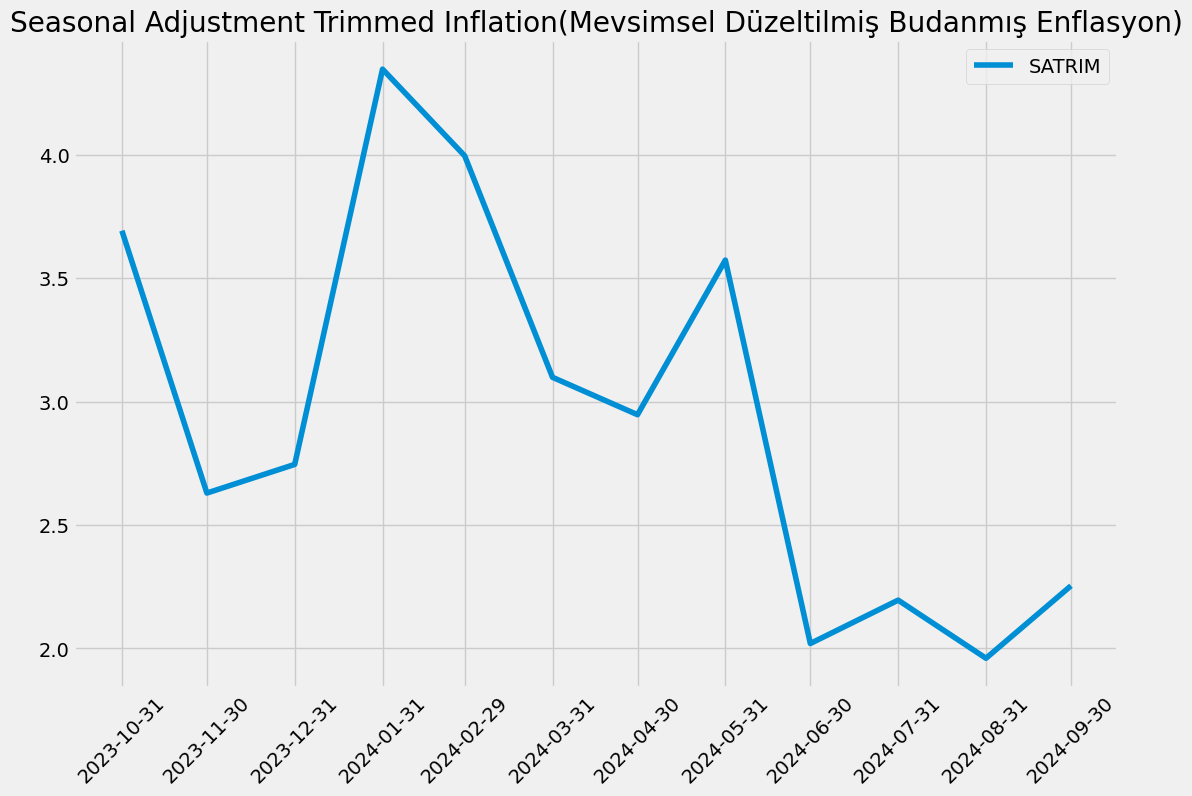

In [34]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(12,8))
plt.title("Seasonal Adjustment Trimmed Inflation(Mevsimsel Düzeltilmiş Budanmış Enflasyon)")
plt.plot(satrims.mean(axis=1).tail(12),label="SATRIM")
plt.xticks(data.tail(12).index,rotation=45)
plt.legend()

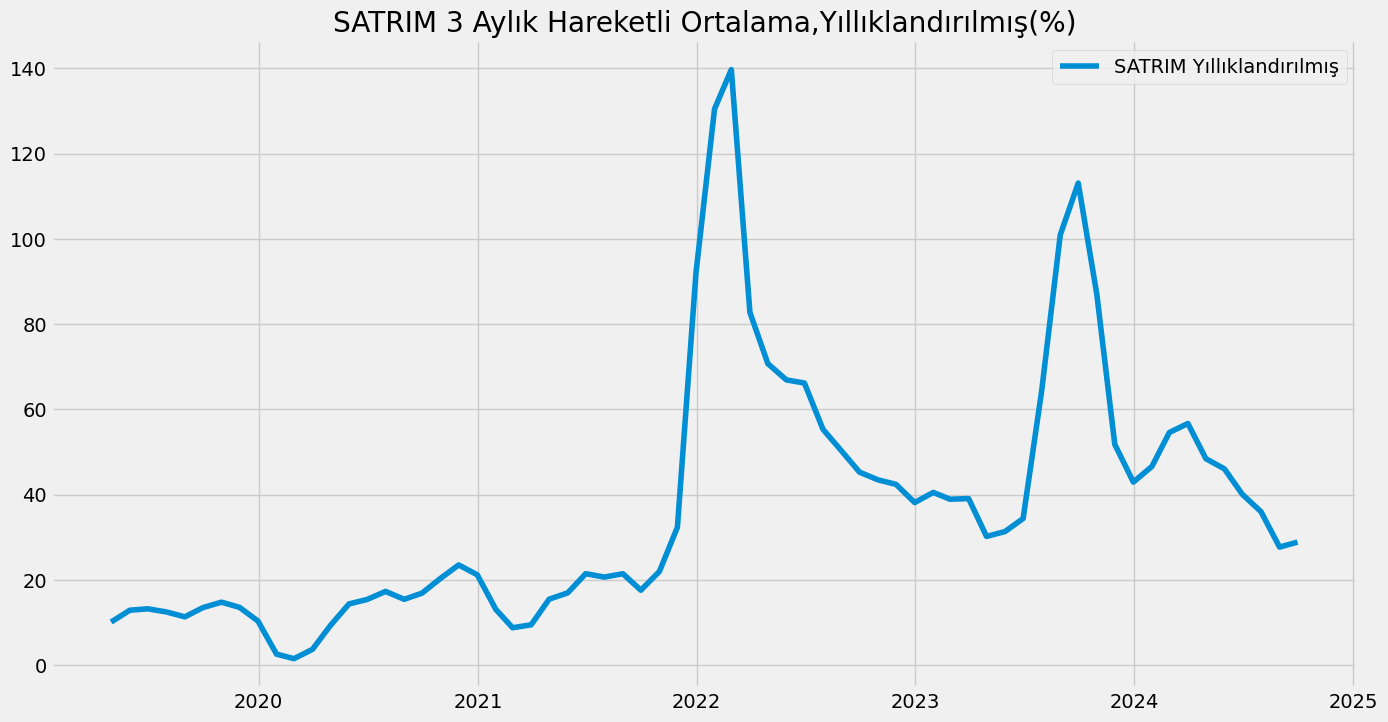

In [35]:
plt.figure(figsize=(15,8))
plt.title("SATRIM 3 Aylık Hareketli Ortalama,Yıllıklandırılmış(%)")
plt.plot((((1+(satrims.mean(axis=1).rolling(3).mean()/100))**12)-1)*100,label="SATRIM Yıllıklandırılmış")
plt.legend()

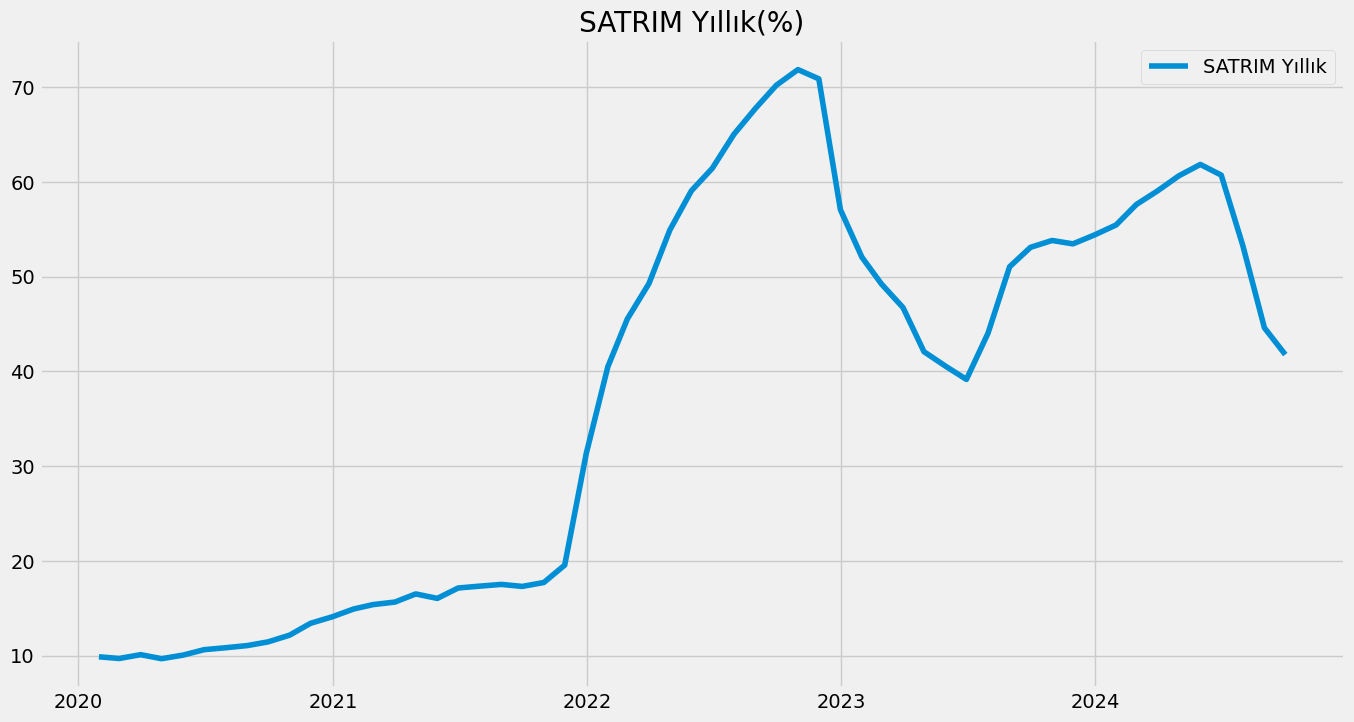

In [36]:
plt.figure(figsize=(15,8))
plt.title("SATRIM Yıllık(%)")
plt.plot(100*((1+(satrims.mean(axis=1)/100)).rolling(window=12).apply(np.prod, raw=True).dropna()-1),label="SATRIM Yıllık")
plt.legend()

In [37]:
path=os.chdir(r'C:\Users\Bora\Documents\Github\Enflasyon-SATRIM')

In [38]:
egilim=pd.concat([satrims.mean(axis=1),datasa.pct_change().median(axis=1)*100,tüfe_B["Enflasyon"],tüfe_C["Enflasyon"]],axis=1)
egilim.columns=["SATRIM","Medyan","B","C"]
egilim

,SATRIM,Medyan,B,C
2005-01-31,NaN,NaN,NaN,NaN
2005-02-28,NaN,NaN,0.606428,0.680507
2005-03-31,NaN,NaN,0.516662,0.581793
2005-04-30,NaN,NaN,0.351238,0.425315
2005-05-31,NaN,NaN,0.503671,0.601389
...,...,...,...,...
2024-05-31,3.573325,3.595618,3.285447,3.174302
2024-06-30,2.019779,1.926478,2.360758,2.284772
2024-07-31,2.195474,2.101262,2.718135,2.755123
2024-08-31,1.960000,2.059116,2.705281,2.779339


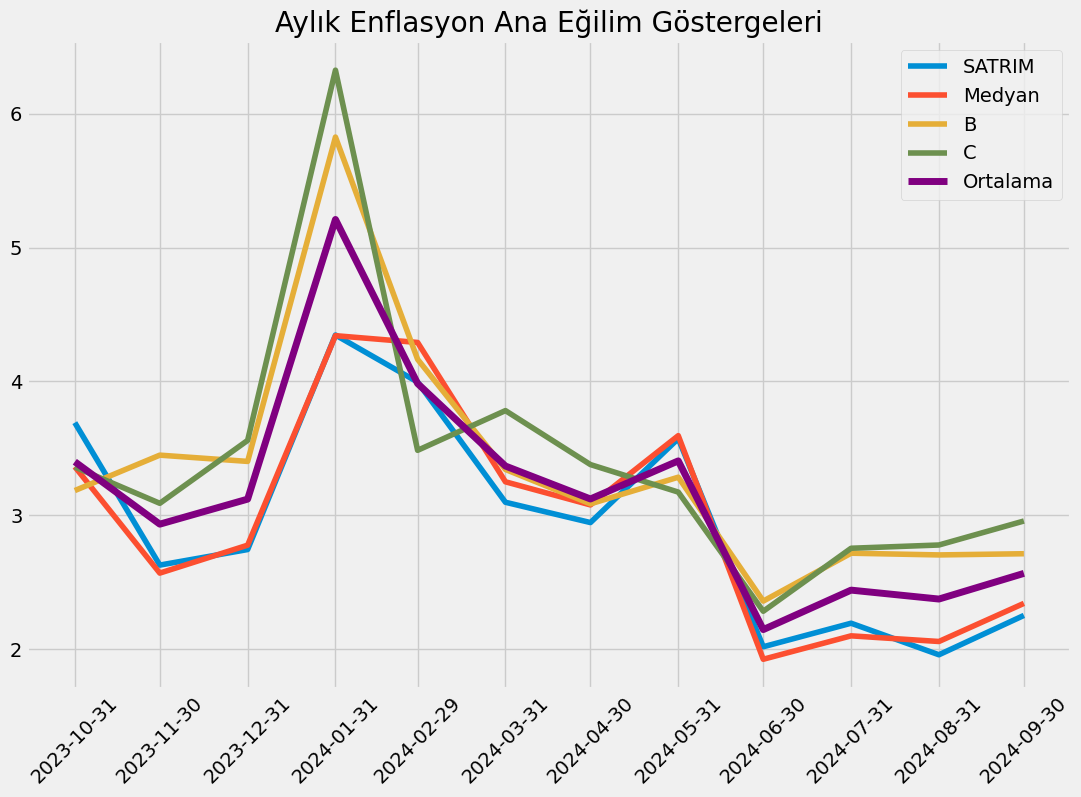

In [39]:
plt.figure(figsize=(12,8))
plt.title("Aylık Enflasyon Ana Eğilim Göstergeleri")
plt.plot(satrims.mean(axis=1).tail(12),label="SATRIM")
plt.plot(datasa.pct_change().median(axis=1).tail(12)*100,label="Medyan")
plt.plot(tüfe_B["Enflasyon"].tail(12),label="B")
plt.plot(tüfe_C["Enflasyon"].tail(12),label="C")
plt.plot(egilim.mean(axis=1).tail(12),label="Ortalama",color="purple",linewidth=5)
plt.xticks(data.tail(12).index,rotation=45)
plt.legend()

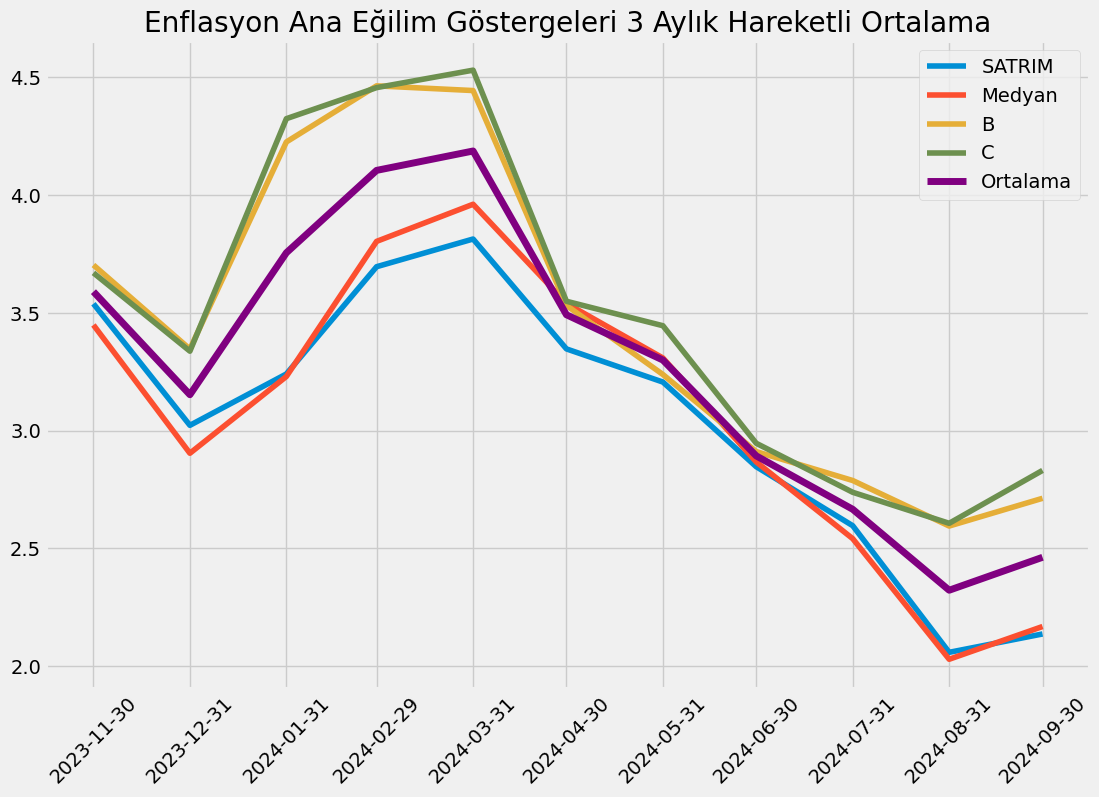

In [40]:
plt.figure(figsize=(12,8))
plt.title("Enflasyon Ana Eğilim Göstergeleri 3 Aylık Hareketli Ortalama")
plt.plot(satrims.mean(axis=1).rolling(3).mean().tail(11),label="SATRIM")
plt.plot(datasa.pct_change().median(axis=1).rolling(3).mean().tail(11)*100,label="Medyan")
plt.plot(tüfe_B["Enflasyon"].rolling(3).mean().tail(11),label="B")
plt.plot(tüfe_C["Enflasyon"].rolling(3).mean().tail(11),label="C")
plt.plot(egilim.mean(axis=1).rolling(3).mean().tail(11),label="Ortalama",color="purple",linewidth=5)
plt.xticks(data.tail(11).index,rotation=45)
plt.legend()

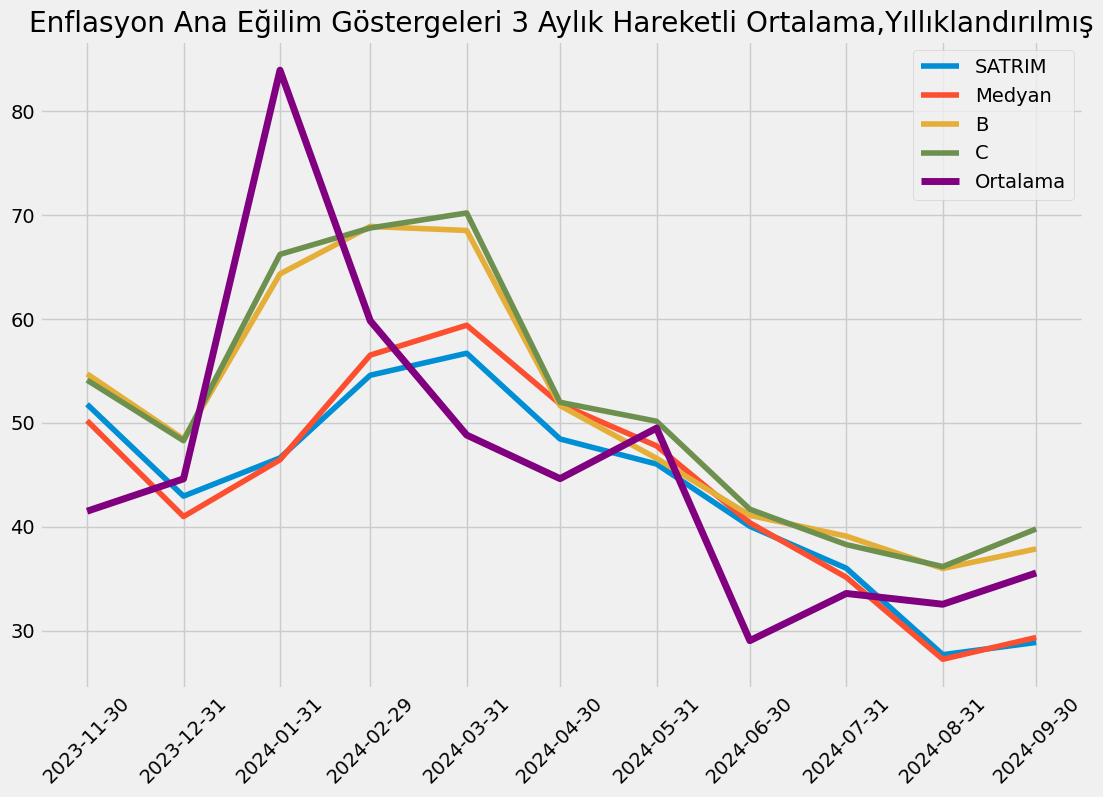

In [41]:
plt.figure(figsize=(12,8))
plt.title("Enflasyon Ana Eğilim Göstergeleri 3 Aylık Hareketli Ortalama,Yıllıklandırılmış")
plt.plot((((1+((satrims.mean(axis=1).rolling(3).mean().tail(11))/100))**12)-1)*100,label="SATRIM")
plt.plot((((((datasa.pct_change().median(axis=1).rolling(3).mean().tail(11)*100)/100)+1)**12)-1)*100,label="Medyan")
plt.plot((((((tüfe_B["Enflasyon"].rolling(3).mean().tail(11))/100)+1)**12)-1)*100,label="B")
plt.plot((((((tüfe_C["Enflasyon"].rolling(3).mean().tail(11))/100)+1)**12)-1)*100,label="C")
plt.plot((((((egilim.mean(axis=1).tail(11))/100)+1)**12)-1)*100,label="Ortalama",color="purple",linewidth=5)
plt.xticks(data.tail(11).index,rotation=45)
plt.legend()

In [54]:
egilim["Mevsimsel Düzeltilmiş Enflasyon"]=tüfe_sa["Enflasyon"]
egilim=egilim.dropna()
egilim["Ortalama"]=egilim.mean(axis=1)
egilim.to_csv("C:/Users/Bora/Documents/GitHub/streamlit-inflation/egilim.csv")
egilim

,SATRIM,Medyan,B,C,Mevsimsel Düzeltilmiş Enflasyon,Ortalama
2019-02-28,0.645410,0.697451,0.348569,0.331544,0.267238,0.458042
2019-03-31,0.688936,0.725865,0.366967,0.388934,0.852380,0.604617
2019-04-30,1.085841,1.151920,0.976862,0.981677,1.239092,1.087079
2019-05-31,1.272203,1.243590,1.119434,0.781746,1.103258,1.104046
2019-06-30,0.763032,0.835552,1.109775,0.830066,0.299598,0.767604
...,...,...,...,...,...,...
2024-05-31,3.573325,3.595618,3.285447,3.174302,3.542301,3.434198
2024-06-30,2.019779,1.926478,2.360758,2.284772,2.383876,2.195132
2024-07-31,2.195474,2.101262,2.718135,2.755123,3.554466,2.664892
2024-08-31,1.960000,2.059116,2.705281,2.779339,2.829167,2.466581


In [52]:
datasa_aylık.to_csv("datasa_aylık.csv")

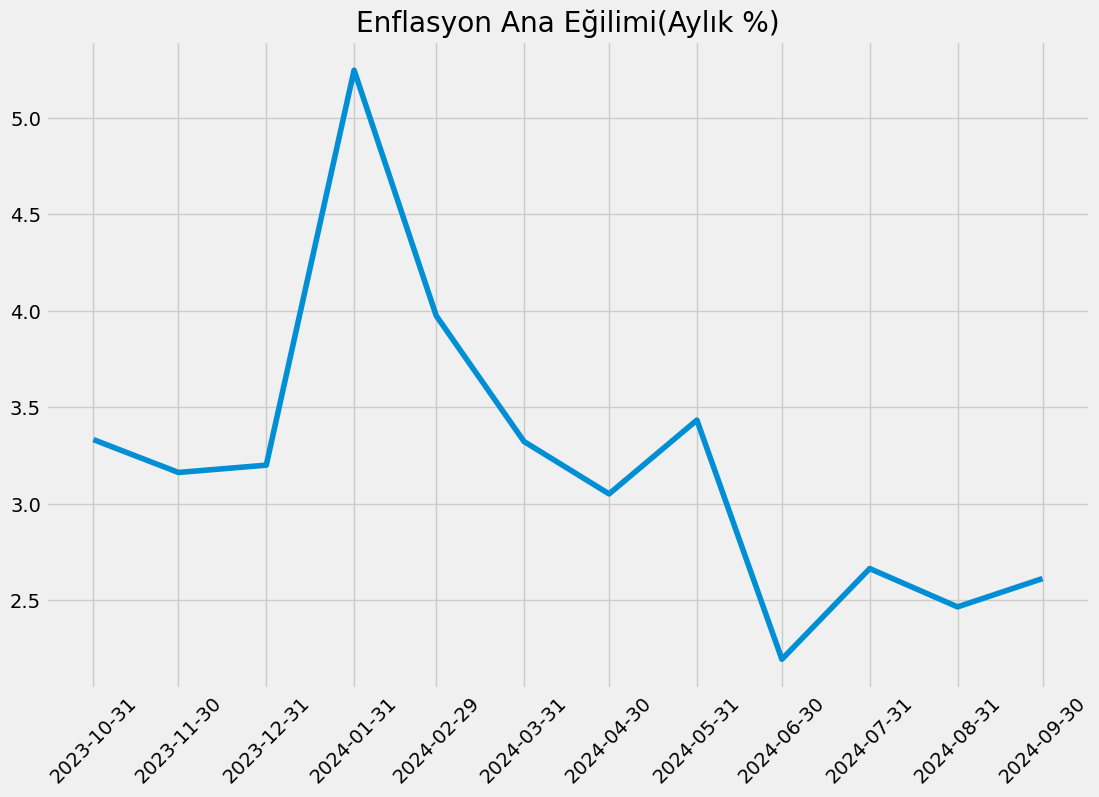

In [53]:
plt.figure(figsize=(12,8))
plt.title("Enflasyon Ana Eğilimi(Aylık %)")
plt.plot(egilim["Ortalama"].tail(12))
plt.xticks(egilim.tail(12).index,rotation=45)
plt.show()